<a href="https://colab.research.google.com/github/xxchanjotxx/Sea-level-predictor/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import calendar
from scipy.stats import linregress



%matplotlib inline

In [40]:
df = pd.read_csv("epa-sea-level.csv", parse_dates = ["Year"], index_col = "Year")
df.head()


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-01-01,0.000000,-0.952756,0.952756,NaN
1,1881-01-01,0.220472,-0.732283,1.173228,NaN
2,1882-01-01,-0.440945,-1.346457,0.464567,NaN
3,1883-01-01,-0.232283,-1.129921,0.665354,NaN
4,1884-01-01,0.590551,-0.283465,1.464567,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      134 non-null    datetime64[ns]
 1   CSIRO Adjusted Sea Level  134 non-null    float64       
 2   Lower Error Bound         134 non-null    float64       
 3   Upper Error Bound         134 non-null    float64       
 4   NOAA Adjusted Sea Level   21 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.4 KB


Text(0.5, 1.0, 'Scatter Plot of CSIRO Adjusted Sea Level Over Time')

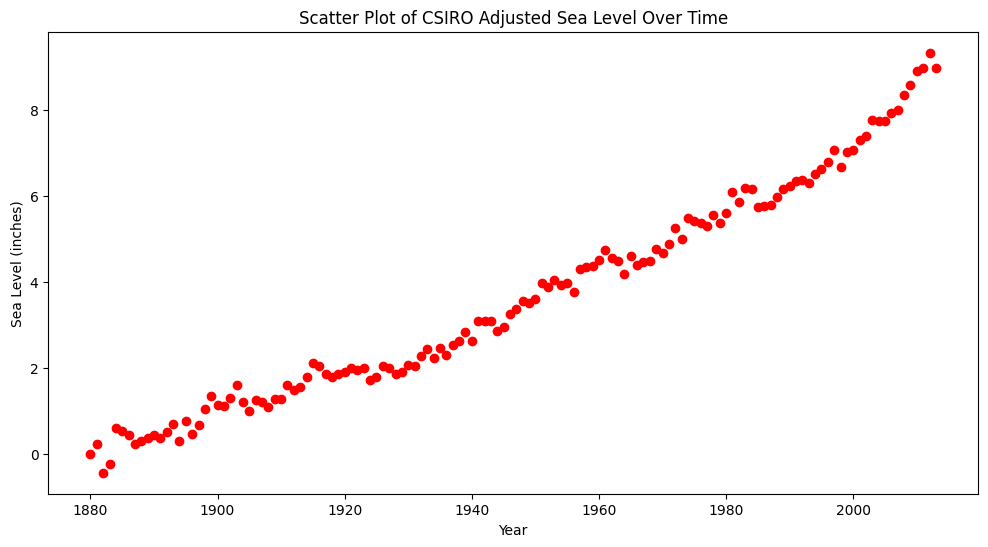

In [42]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(df["Year"],df["CSIRO Adjusted Sea Level"], color = "r")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title('Scatter Plot of CSIRO Adjusted Sea Level Over Time')


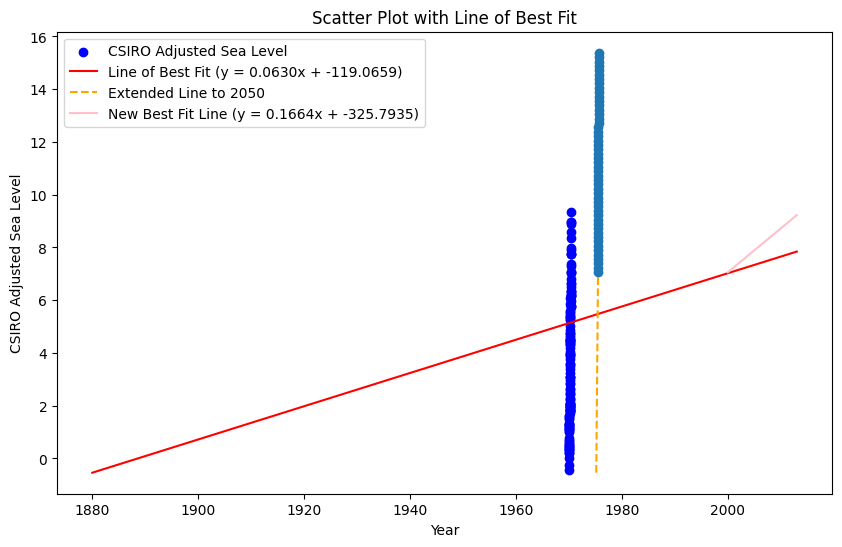

In [55]:

# Assuming df is your DataFrame with "CSIRO Adjusted Sea Level" column and "Year" column
# Replace 'your_dataset.csv' with the actual file path if you're loading from a CSV
# df = pd.read_csv('your_dataset.csv')

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.index, df['CSIRO Adjusted Sea Level'], label="CSIRO Adjusted Sea Level", color='blue')

# Calculate the line of best fit using linregress
slope, intercept, r_value, p_value, std_err = linregress(df.index.year, df['CSIRO Adjusted Sea Level'])

# # Plot the line of best fit
ax.plot(df['Year'], slope * df['Year'] + intercept, color='red', label=f'Line of Best Fit (y = {slope:.4f}x + {intercept:.4f})')

# # Extend the line to the year 2050
extended_years = range(df['Year'].min(), 2051)
ax.plot(extended_years, slope * extended_years + intercept, '--', color='orange', label='Extended Line to 2050')

# # Set labels and title





# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
# Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
x2 = df[df["Year"] >=2000]
y2 = df[df["Year"] >=2000]
new_slope, new_intercept, new_r_value, new_p_value, new_stderr = linregress(x2["Year"], y2["CSIRO Adjusted Sea Level"])
ax.plot(x2["Year"], new_slope*x2["Year"]+new_intercept, color = "pink", label = f"New Best Fit Line (y = {new_slope:.4f}x + {new_intercept:.4f})")
new_extended_years = range(x2["Year"].min(), 2051)
ax.plot(new_extended_years, new_slope*new_extended_years+new_intercept, "-o")


plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()

# # Show the plot
plt.show()


In [46]:
print(df.dtypes)


Year                        datetime64[ns]
CSIRO Adjusted Sea Level           float64
Lower Error Bound                  float64
Upper Error Bound                  float64
NOAA Adjusted Sea Level            float64
dtype: object
